In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import tensorflow as tf
import shap


In [2]:
df = pd.read_csv("outliersRemoved.csv")

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df

,CONS_NO,FLAG,2014-01-01,2014-01-02,2014-01-03,2014-01-04,2014-01-05,2014-01-06,2014-01-07,2014-01-08,...,2016-10-22,2016-10-23,2016-10-24,2016-10-25,2016-10-26,2016-10-27,2016-10-28,2016-10-29,2016-10-30,2016-10-31
0,0387DD8A07E07FDA6271170F86AD9151,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,7.18,8.07,8.09,9.53,5.48,8.75,9.30,7.54,9.16,6.74
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.95,17.95,17.83,17.31,21.44,19.09,18.56,16.25,14.20,13.66
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,12.81,15.12,17.26,14.91,19.59,20.79,17.95,19.26,14.46,11.72
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.90,5.64,6.99,3.32,3.61,5.35,4.73,3.68,...,14.21,10.22,8.47,6.11,6.10,6.73,7.52,10.89,9.86,8.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42367,F1472871E1AFF49D4289564B6377D76C,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.27,3.10,2.75,3.01,2.99,2.83,2.54,3.40,3.59,2.54
42368,F3C8BBCD2DC26C1E0249DEEF6A4256B7,0,2.70,0.00,0.00,5.72,6.05,5.81,3.07,4.04,...,3.84,6.62,3.12,5.16,3.62,4.64,3.71,6.22,6.05,4.77
42369,A9A0FE83467A680FBFB0DBFC910DF227,0,0.58,1.16,0.92,0.98,1.54,1.38,0.89,0.70,...,0.99,0.61,0.65,0.55,0.49,0.51,0.79,0.66,0.39,0.65
42370,D9A6ADA018FA46A55D5438370456AA45,0,16.89,15.15,19.28,17.19,16.80,17.48,17.86,23.99,...,15.64,16.48,13.04,10.39,12.00,11.15,12.22,13.16,13.33,10.39


In [5]:
y = df["FLAG"].values
dfX = df.drop("CONS_NO", axis = 1)
x = dfX.drop("FLAG", axis=1).values


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 15)

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)



In [8]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

x_train = x_train.reshape((33897, 47, 22, 1))
x_test = x_test.reshape((8475,47, 22,1)) 
print(x_train.shape)
print(x_test.shape)


(33897, 1034)
(33897,)
(8475, 1034)
(8475,)
(33897, 47, 22, 1)
(8475, 47, 22, 1)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()

model.add(tf.keras.layers.Conv2D(filters = 12, kernel_size = (3,3), input_shape = (47, 22, 1), activation='relu'))

model.add(tf.keras.layers.Conv2D(filters = 18, kernel_size = (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))



model.add(tf.keras.layers.Conv2D(filters = 36,kernel_size = (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(filters = 54,kernel_size = (3,3), activation='relu'))


model.add(tf.keras.layers.Flatten())
model.add(Dense(40, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=200)

Epoch 1/10
170/170 [==============================] - 36s 209ms/step - loss: 0.3241 - accuracy: 0.9116 - val_loss: 0.2925 - val_accuracy: 0.9127
Epoch 2/10
170/170 [==============================] - 35s 206ms/step - loss: 0.2874 - accuracy: 0.9154 - val_loss: 0.2918 - val_accuracy: 0.9119
Epoch 3/10
170/170 [==============================] - 35s 208ms/step - loss: 0.2863 - accuracy: 0.9155 - val_loss: 0.2876 - val_accuracy: 0.9120
Epoch 4/10
170/170 [==============================] - 36s 212ms/step - loss: 0.2837 - accuracy: 0.9159 - val_loss: 0.2852 - val_accuracy: 0.9128
Epoch 5/10
170/170 [==============================] - 58s 343ms/step - loss: 0.2821 - accuracy: 0.9161 - val_loss: 0.2818 - val_accuracy: 0.9120
Epoch 6/10
170/170 [==============================] - 51s 301ms/step - loss: 0.2741 - accuracy: 0.9162 - val_loss: 0.2771 - val_accuracy: 0.9127
Epoch 7/10
170/170 [==============================] - 61s 357ms/step - loss: 0.2733 - accuracy: 0.9166 - val_loss: 0.2748 - val_ac

In [13]:
model.history.history

{'loss': [0.32414764165878296,
  0.28742533922195435,
  0.2863040268421173,
  0.28374433517456055,
  0.28212815523147583,
  0.2740898132324219,
  0.27325087785720825,
  0.2712225317955017,
  0.26893824338912964,
  0.26795732975006104],
 'accuracy': [0.9115850925445557,
  0.9154497385025024,
  0.9154792428016663,
  0.9158627390861511,
  0.9161282777786255,
  0.9162167906761169,
  0.9166002869606018,
  0.916570782661438,
  0.9169837832450867,
  0.9170132875442505],
 'val_loss': [0.29250195622444153,
  0.29177752137184143,
  0.28764835000038147,
  0.28523191809654236,
  0.28183794021606445,
  0.2771092355251312,
  0.27481162548065186,
  0.27710556983947754,
  0.2734741270542145,
  0.27482619881629944],
 'val_accuracy': [0.9126843810081482,
  0.9118583798408508,
  0.9119763970375061,
  0.9128023386001587,
  0.9119763970375061,
  0.9126843810081482,
  0.912920355796814,
  0.9120944142341614,
  0.9133923053741455,
  0.9131563305854797]}

In [14]:
loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]


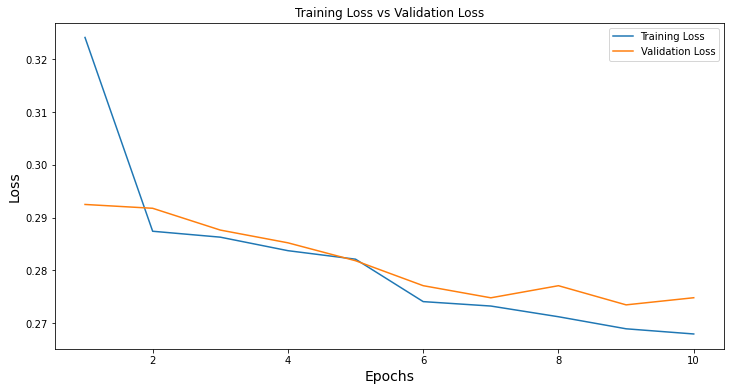

In [15]:
epochs = np.arange(1, len(loss) + 1)
plt.figure(figsize=(12,6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Training Loss vs Validation Loss')

plt.legend()

In [16]:
trainLoss, trainacc = model.evaluate(x_train, y_train, verbose = 0)

In [17]:
testLoss, testacc = model.evaluate(x_test, y_test, verbose = 0)

In [18]:
print(trainacc)
print(testacc)

0.9174852967262268
0.9131563305854797


In [19]:
predict = model.predict(x_test)

In [21]:
predict = pd.Series(predict.reshape(8475,))

In [22]:
y_pred = predict.round()

In [26]:
y_true = y_test

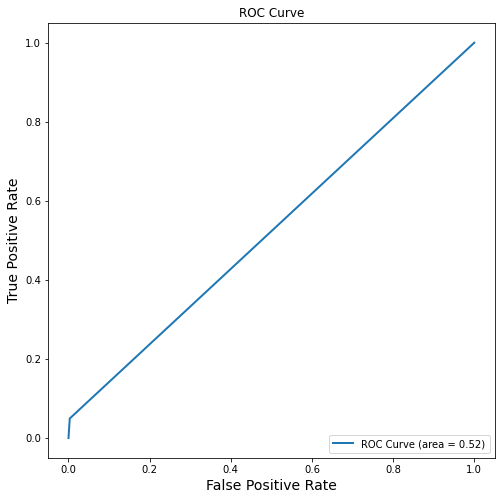

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
plt.figure(figsize=(8, 8))
false_positive_rate, true_positive_rate, _ = roc_curve(y_true,y_pred, pos_label=1)
roc_auc = roc_auc_score(y_true, y_pred)
plt.plot(false_positive_rate, true_positive_rate, lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve')
plt.legend(loc='lower right')

Text(0.5, 1.0, 'Karmaşıklık Matrisi ')

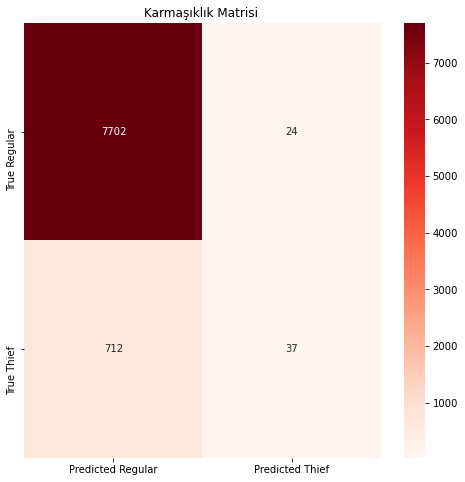

In [28]:
matrix = confusion_matrix (y_true, y_pred)


plt.figure(figsize=(8, 8))
sbn.heatmap(matrix, annot=True, fmt='.5g', cmap='Reds', 
        xticklabels=['Predicted Regular', 'Predicted Thief'], 
        yticklabels=['True Regular', 'True Thief'])
plt.title('Karmaşıklık Matrisi ')

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred, labels=[0, 1], 
                              target_names=['Regular', 'Thief']))

              precision    recall  f1-score   support

     Regular       0.92      1.00      0.95      7726
       Thief       0.61      0.05      0.09       749

    accuracy                           0.91      8475
   macro avg       0.76      0.52      0.52      8475
weighted avg       0.89      0.91      0.88      8475

